# Crown City - ML Assessment

Problem 1: *identify the cause of this churn among SME customers.*

Problem 2: *determine which customers are more or less likely to churn at their current prices, using a predictive model*



## Task 1
> Formulate the hypothesis as a data science problem and detail the key steps required to test it. Send an email to your Associate Director outlining your thoughts and findings, with a focus on the data that will be needed from the client and the analytical methods that will be used to test the hypothesis.


Claim: **churn is caused by price sensitivity**


### Plan to Test Hypothesis
To test the hypothesis that **churn is caused by price sensitivity**, I will proceed in 4 steps:

- Step 1: Define the Null and Alternative Hypothesis
  - For this business problem of churn prediction, I will formulate the following null and alternate hypothesis.
    - Null Hypothesis H<sub>0</sub>: Customer Churn is not affected by consumer price sensitivity.
    - Alternate Hypothesis H<sub>a</sub>: Customer churn is affected by consumer price sensitivity.
  <p>The null hypothesis is the default state of the world and data gathered will be used to reject the Null Hypothesis. If we <b>reject the null hypothesis (H<sub>0</sub>)</b> that consumer price sensitivity does not affect customer churn, then this provides evidence in favor of the alternative hypothesis (H<sub>a</sub>) that Customer churn is affected by consumer price sensitivity. By contrast, if we <b>fail to reject the null hypothesis (H<sub>0</sub>)</b>, then our findings are more nebulous/inconclusive: we will not know whether we failed to reject H<sub>0</sub> because our sample size was too small (in which case testing H<sub>0</sub> again on a larger or higher-quality dataset might lead to rejection), or whether we failed to reject H<sub>0</sub> because H0 really holds.</p>
- Step 2: Construct a test statistic that summarizes the strength of evidence against the null hypothesis.
  <p>For this test, we will compute the T-statistic for the given data. The data needed to compute the t-statistic is historical record of customers and price paid over time.</p>
- Step 3: Compute a p-value.
  <p> In this step, the t-statistic is converted to a p-value. This quantifies the probability of having obtained a comparable or more extreme value of the test statistic under the null hypothesis. Therefore, a small p-value provides evidence against H<sub>0</sub>.</p>
- Step 4: Based on the p-value, decide whether to *reject* or *fail to reject* the null hypothesis.
  <p> A small p-value indicates that the value of the test statistic is unlikely to occur under H<sub>0</sub>, and thereby provides evidence against H<sub>0</sub>. If the p-value is sufficiently small, then we will want to reject H<sub>0</sub> and, therefore, make a “discovery” about H<sub>a</sub>.</p>




## Task 2

> Conduct an initial examination of the data, including identifying the types of data, calculating statistics, focusing on certain aspects, and determining the distribution of variables. The goal of this initial step is to gain a comprehensive understanding of the dataset. 

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dash import dcc
from mlxtend.plotting import scatterplotmatrix, heatmap
import phik
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
import statsmodels.api as stats_models
import pickle
import gradio as gr
from skops import hub_utils

c:\Users\marvi\OneDrive\Documents\Crown City\ML Assessment\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:
# Load the dataset

client_data_url = 'Data/client_data.csv'


cl_df = pd.read_csv(client_data_url)


# Preview the client data set
cl_df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t      0.00   
1      2009-08-21   2015-08-31             189.95  ...        f      0.00   
2      2010-04-16   2015-04-17              47.96  ...        f      0.00   
3      2010-03-30   2015-03-31             240.04  ...        f      0.00   
4      2010-01-13   2015-03-09             445.75  ...        f     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
3               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0  
4               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0  

[5 rows x 26 columns]

In [3]:
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [4]:
# Check for missing data
cl_df.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

> The above reveals there is NO missing data (represented by nulls or na's)

In [5]:
# Optimizing the datatypes of the cols

cl_df = (
    cl_df
    # Convert the data to their corresponding data types
    .assign(
        # Working with Electricity consumption cols
        cons_12m = cl_df['cons_12m'].astype('float32'),
        cons_gas_12m = cl_df['cons_gas_12m'].astype('float32'),
        cons_last_month = cl_df['cons_last_month'].astype('float32'),
        forecast_cons_12m = cl_df['forecast_cons_12m'].astype('float32'),
        forecast_cons_year = cl_df['forecast_cons_year'].astype('float32'),
        forecast_discount_energy = cl_df['forecast_discount_energy'].astype('int8'),
        forecast_meter_rent_12m = cl_df['forecast_meter_rent_12m'].astype('float32'),
        # Working with Price Columns
        forecast_price_energy_off_peak = cl_df['forecast_price_energy_off_peak'].astype('float16'),
        forecast_price_energy_peak = cl_df['forecast_price_energy_peak'].astype('float16'),
        forecast_price_pow_off_peak = cl_df['forecast_price_pow_off_peak'].astype('float32'),
        # Working with the date columns
        date_activ = pd.to_datetime(cl_df['date_activ'], format='%Y-%m-%d'), 
        date_end = pd.to_datetime(cl_df['date_end'], format='%Y-%m-%d'),
        date_modif_prod = pd.to_datetime(cl_df['date_modif_prod'], format='%Y-%m-%d'),
        date_renewal = pd.to_datetime(cl_df['date_renewal'], format='%Y-%m-%d'),
        # Optimizing the remaining columns
        imp_cons = cl_df['imp_cons'].astype('float32'),
        margin_gross_pow_ele = cl_df['margin_gross_pow_ele'].astype('float32'),
        margin_net_pow_ele = cl_df['margin_net_pow_ele'].astype('float32'),
        nb_prod_act = cl_df['nb_prod_act'].astype('float16'),
        net_margin = cl_df['net_margin'].astype('float32'),
        num_years_antig = cl_df['num_years_antig'].astype('float32'),
        pow_max = cl_df['pow_max'].astype('float32'),
        churn = cl_df['churn'].astype('int8'),
        
    )
)


cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  float32       
 3   cons_gas_12m                    14606 non-null  float32       
 4   cons_last_month                 14606 non-null  float32       
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float32       
 10  forecast_cons_year              14606 non-null  float32       
 11  fo

In [6]:
quarterly_price_df = (
    cl_df
    # Set the index to the date activated
    .set_index('date_activ')
    # Resample monthly
    .resample('Q')
    # Determine the means
    .mean()
    # Reset the index
    .reset_index()
    # Select the forecast_price_energy_off_peak
    [['forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'forecast_price_energy_off_peak', 'date_activ']]   
)


# Note that I am ploting the quarterly mean price for forecast_price_energy_peak 

fig_1 = px.line(
    data_frame = quarterly_price_df,
    x = 'date_activ',
    y = 'forecast_price_pow_off_peak',
)


# fig_1.update_layout(title='Mean Forecast Price per Quarter')



# Note that I am plotting the quarterly mean price for forecast_price_energy_off_peak 

fig_2 = px.line(
    data_frame = quarterly_price_df,
    x = 'date_activ',
    y = 'forecast_price_energy_off_peak',
)


# fig_2.update_layout(title='Mean Forecast Price off Peak per Quarter')




# Note that I am plotting the quarterly mean price for forecast_price_energy_peak 

fig_3 = px.line(
    data_frame = quarterly_price_df,
    x = 'date_activ',
    y = 'forecast_price_energy_peak',
)


# fig_3.update_layout(title='Mean Forecast Price Peak per Quarter')



# For as many traces that exist per Express figure, get the traces from each plot and store them in an array.
# This is essentially breaking down the Express fig into it's traces
fig_1_traces = []
fig_2_traces = []
fig_3_traces = []



for trace in range(len(fig_1["data"])):
    fig_1_traces.append(fig_1["data"][trace])
    
    
for trace in range(len(fig_2["data"])):
    fig_2["data"][trace]['showlegend'] = False             
    fig_2_traces.append(fig_2["data"][trace])
    
    
for trace in range(len(fig_3["data"])):
    fig_3["data"][trace]['showlegend'] = False             
    fig_3_traces.append(fig_3["data"][trace])
    
    
# Create a 1x2 subplot
this_figure = make_subplots(rows = 3, cols = 1, subplot_titles = ['Mean Forecast Price Power off Peak per Quarter', 'Mean Forecast Price Energy off Peak per Quarter', 'Mean Forecast Price Energy Peak per Quarter'])

this_figure.update_layout(height = 500, width = 1200, title_font_size = 25)

# this_figure.update_xaxes(title='Date Activated')



# Get the Express fig broken down as traces and add the traces to the proper plot within the subplot
for traces in fig_1_traces:
    this_figure.append_trace(traces, row = 1, col = 1)
    
    
for traces in fig_2_traces:
    this_figure.append_trace(traces, row = 2, col = 1)
    
for traces in fig_3_traces:
    this_figure.append_trace(traces, row = 3, col = 1)   
    
    
    
this_figure.show()




C:\Users\marvi\AppData\Local\Temp\ipykernel_41924\2678269163.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cl_df


In [7]:
fig = px.histogram(cl_df, 
                   x='forecast_price_pow_off_peak',
                   color='churn',
                   title='Forecast Price Distribution',
                   nbins=30
                   )

fig.show()

In [8]:


df = (
    cl_df
    .groupby(['churn', 'channel_sales'])
    [['churn']].count()
    .assign(count = lambda df_: df_['churn'])
    .drop(['churn'], axis=1)
    .reset_index()
    .sort_values(by='churn', ascending=False)
)




fig_1 = px.bar(
    data_frame=df.loc[df['churn'] == 1],
    x='churn',
    y = 'count',
    color='channel_sales',
    barmode='group',
    text_auto=True,
    # facet_row='churn'
)


fig_2 = px.bar(
    data_frame=df.loc[df['churn'] == 0],
    x='churn',
    y = 'count',
    color='channel_sales',
    barmode='group',
    text_auto=True,
    # facet_row='churn'
)

# For as many traces that exist per Express figure, get the traces from each plot and store them in an array.
# This is essentially breaking down the Express fig into it's traces
fig_1_traces = []
fig_2_traces = []



for trace in range(len(fig_1["data"])):
    fig_1_traces.append(fig_1["data"][trace])
    
    
for trace in range(len(fig_2["data"])):
    fig_2["data"][trace]['showlegend'] = False             
    fig_2_traces.append(fig_2["data"][trace])
    
# Create a 1x2 subplot
this_figure = make_subplots(rows = 1, cols = 2, subplot_titles = ['Churn = 1', 'Churn = 0'])

this_figure.update_layout(height = 500, width = 1200, title_text = "Churn by Channel Sales", title_font_size = 25)



# Get the Express fig broken down as traces and add the traces to the proper plot within the subplot
for traces in fig_1_traces:
    this_figure.append_trace(traces, row = 1, col = 1)
    
    
for traces in fig_2_traces:
    this_figure.append_trace(traces, row = 1, col = 2)
    
this_figure.show()




# fig.update_layout(height=600, width=800)

# fig.show()


In [9]:
# Check the Distribution of prices paid per channel for churned customers 

fig_1 = px.box(
    data_frame=cl_df.loc[cl_df['churn'] == 0],
    # data_frame=cl_df,
    y = 'forecast_price_pow_off_peak',
    x = 'churn',
    color='channel_sales',
    points='all'
    # facet_col='churn'
)


fig_2 = px.box(
    data_frame=cl_df.loc[cl_df['churn'] == 1],
    # data_frame=cl_df,
    y = 'forecast_price_pow_off_peak',
    x = 'churn',
    color='channel_sales',
    points='all'
    # facet_col='churn'
)




In [10]:
med_price_per_channel_df = (
    cl_df
    # Grouped by channel sales and churn
    .groupby(['channel_sales', 'churn'])
    # I selected forecast price
    ['forecast_price_pow_off_peak'].agg(['mean', 'median', 'count'])
    .reset_index()
    [['channel_sales', 'churn', 'median']]
)


px.bar(
    data_frame = med_price_per_channel_df,
    x = 'channel_sales',
    y = 'median',
    color = 'channel_sales',
    facet_col='churn'
)

In [11]:
# Churn vs forecast price pow off peak


fig_1 = px.box(
    data_frame = cl_df.loc[cl_df['churn'] == 0],
    y = 'forecast_price_pow_off_peak',
    x = 'churn',
    # template='plotly_white',
    points='all'
)




fig_2 = px.box(
    data_frame = cl_df.loc[cl_df['churn'] == 1],
    y = 'forecast_price_pow_off_peak',
    x = 'churn',
    points='all'
)


# For as many traces that exist per Express figure, get the traces from each plot and store them in an array.
# This is essentially breaking down the Express fig into it's traces
fig_1_traces = []
fig_2_traces = []



for trace in range(len(fig_1["data"])):
    fig_1_traces.append(fig_1["data"][trace])
    
    
for trace in range(len(fig_2["data"])):
    fig_2["data"][trace]['showlegend'] = False             
    fig_2_traces.append(fig_2["data"][trace])
    
# Create a 1x2 subplot
this_figure = make_subplots(rows = 1, cols = 2, subplot_titles = ['Churn = 0', 'Churn = 1'])

this_figure.update_layout(height = 500, width = 1200, title_text = "Distribution of Price Paid per Channel", title_font_size = 25)

this_figure.update_yaxes(title='forecast_price_pow_off_peak')



# Get the Express fig broken down as traces and add the traces to the proper plot within the subplot
for traces in fig_1_traces:
    this_figure.append_trace(traces, row = 1, col = 1)
    
    
for traces in fig_2_traces:
    this_figure.append_trace(traces, row = 1, col = 2)
    
this_figure.show()


In [12]:
# Churn vs forecast_price_energy_off_peak

fig = px.box(
    data_frame = cl_df,
    y = 'forecast_price_energy_off_peak',
    x = 'churn',
    color='churn',
    points='all'
)

fig.show()

In [13]:
# Churn vs forecast_price_energy_off_peak

fig = px.box(
    data_frame = cl_df,
    y = 'forecast_price_energy_peak',
    x = 'churn',
    color='churn',
    points='all'
)

fig.show()

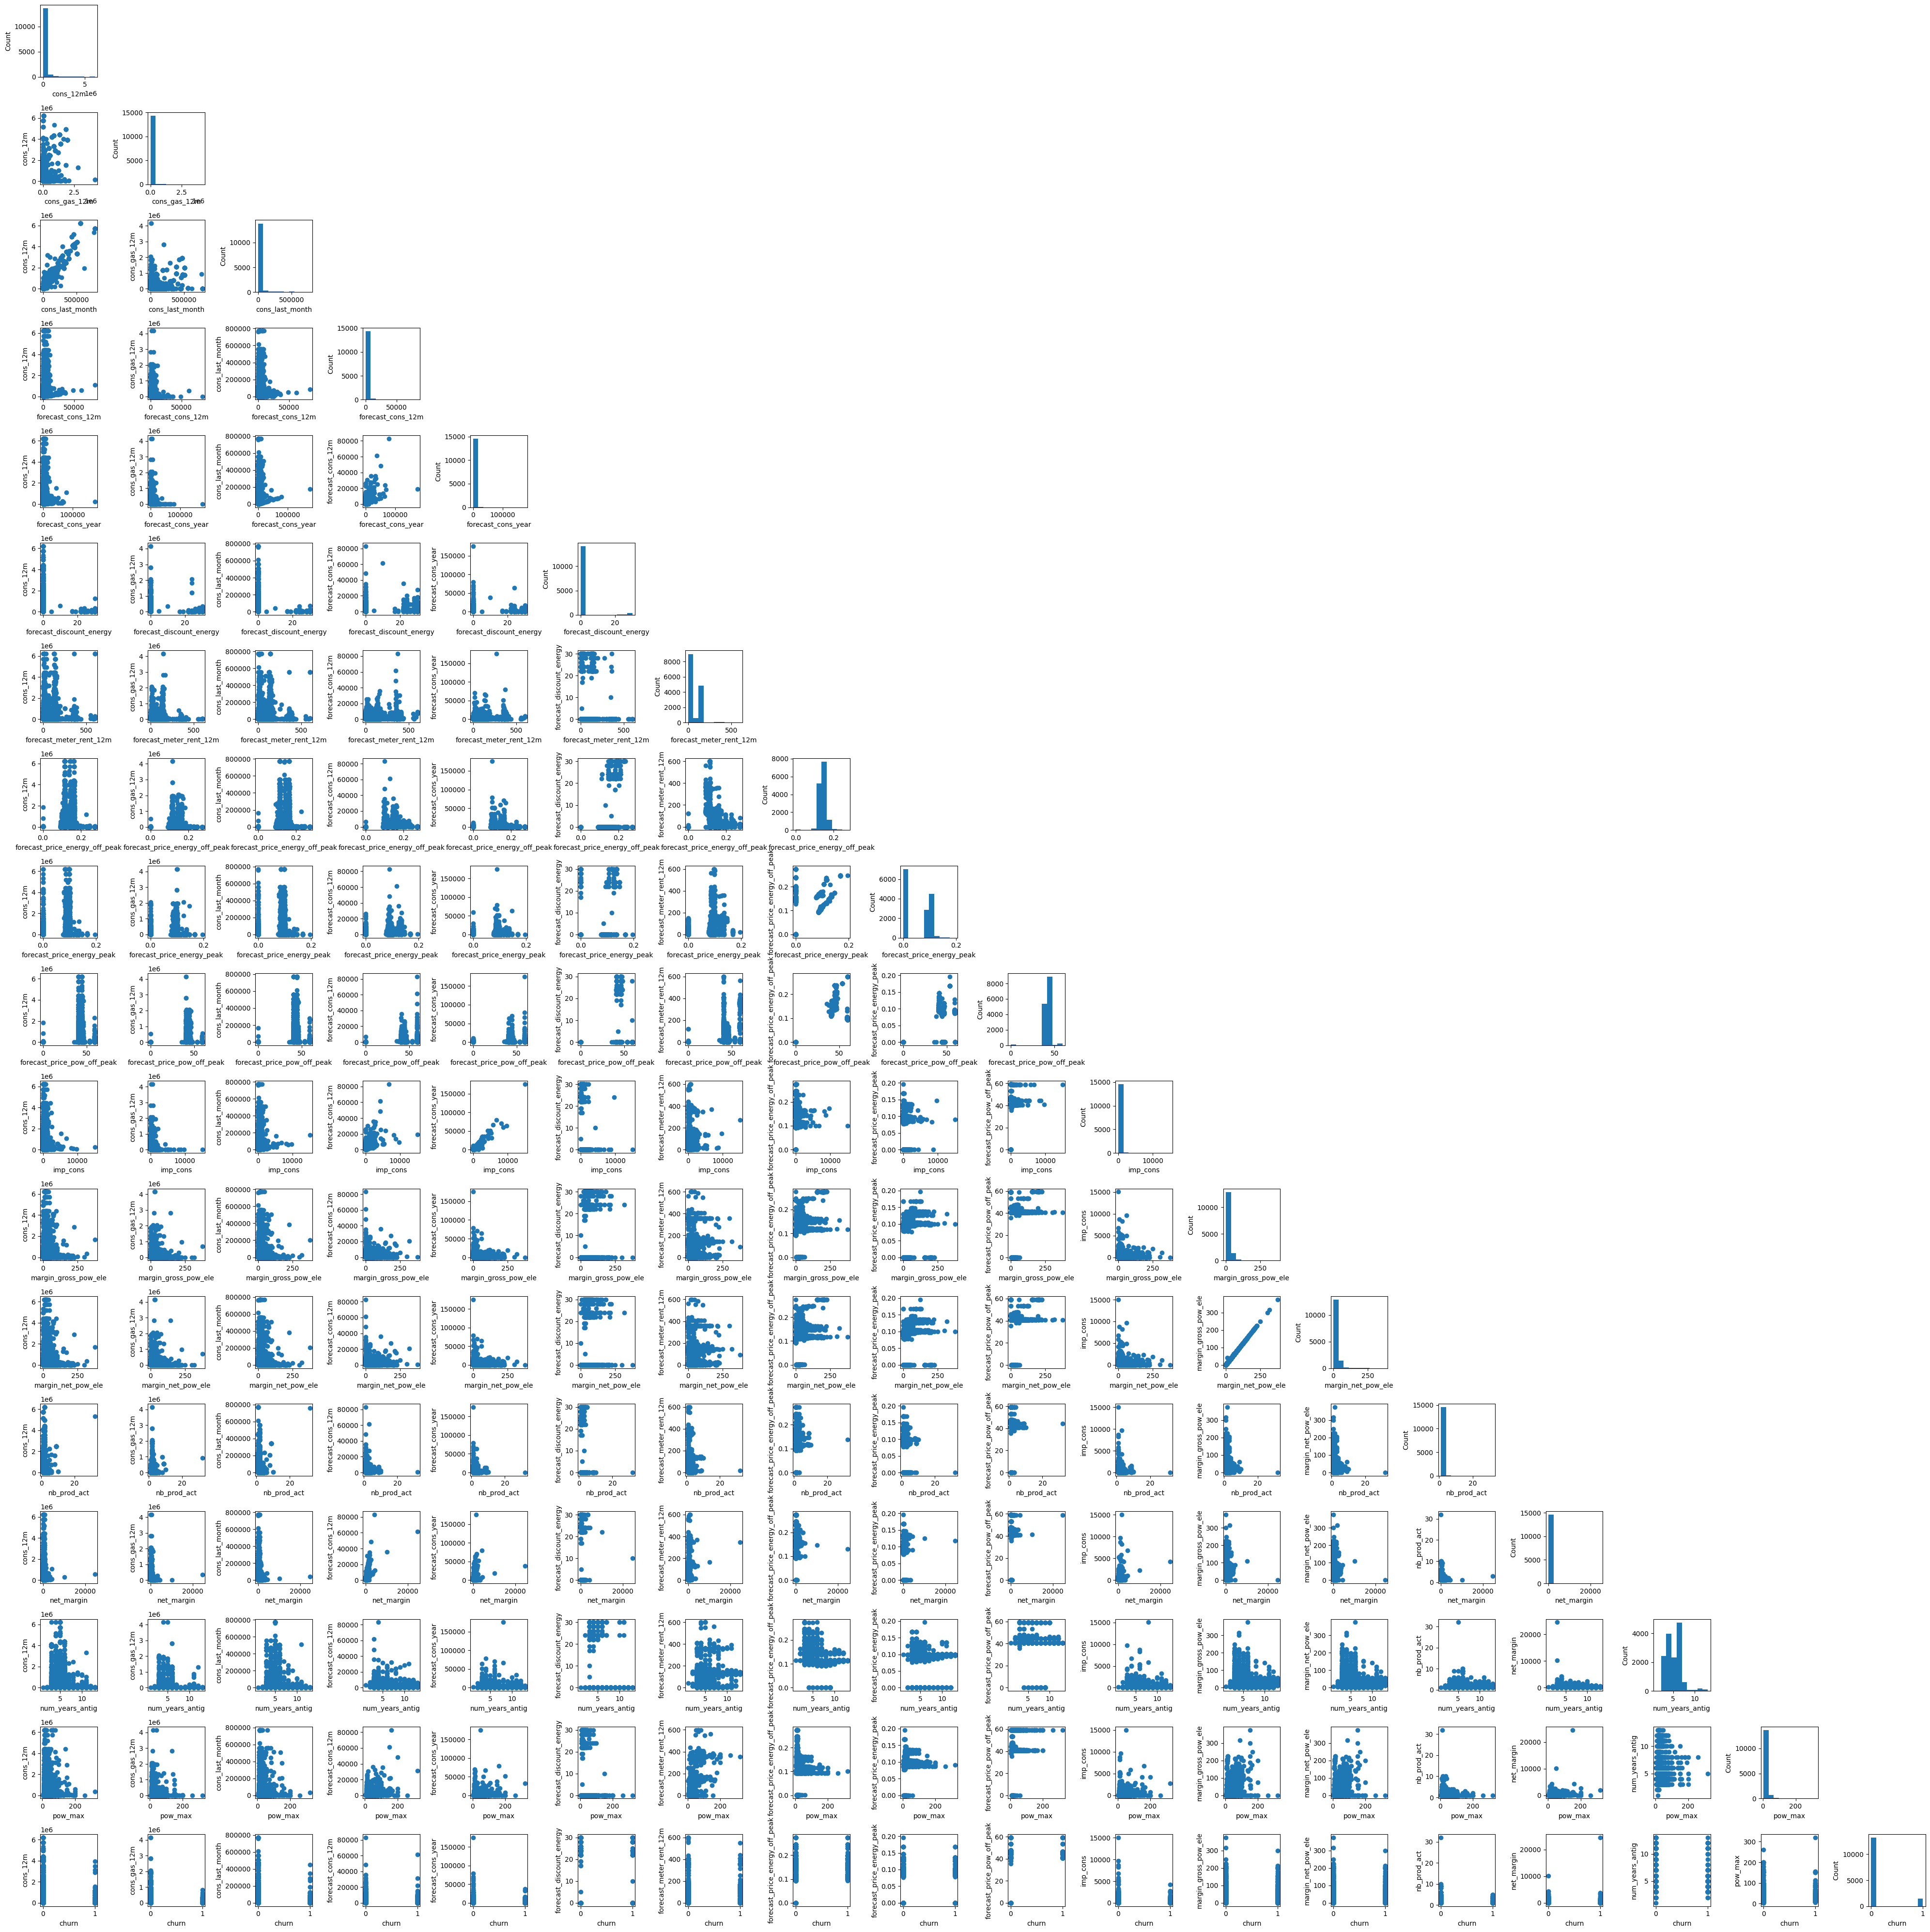

In [14]:
# Plotting a scatterplot matrix with MLxtendfor all numeric features
num_feature_cols = [col for col in cl_df.columns if col in cl_df.select_dtypes('number').columns and col != 'churn']



scatterplotmatrix(
    cl_df[num_feature_cols + ['churn']].values,
    figsize=(40,40),
    names=num_feature_cols + ['churn'],
)

plt.tight_layout()


plt.show()

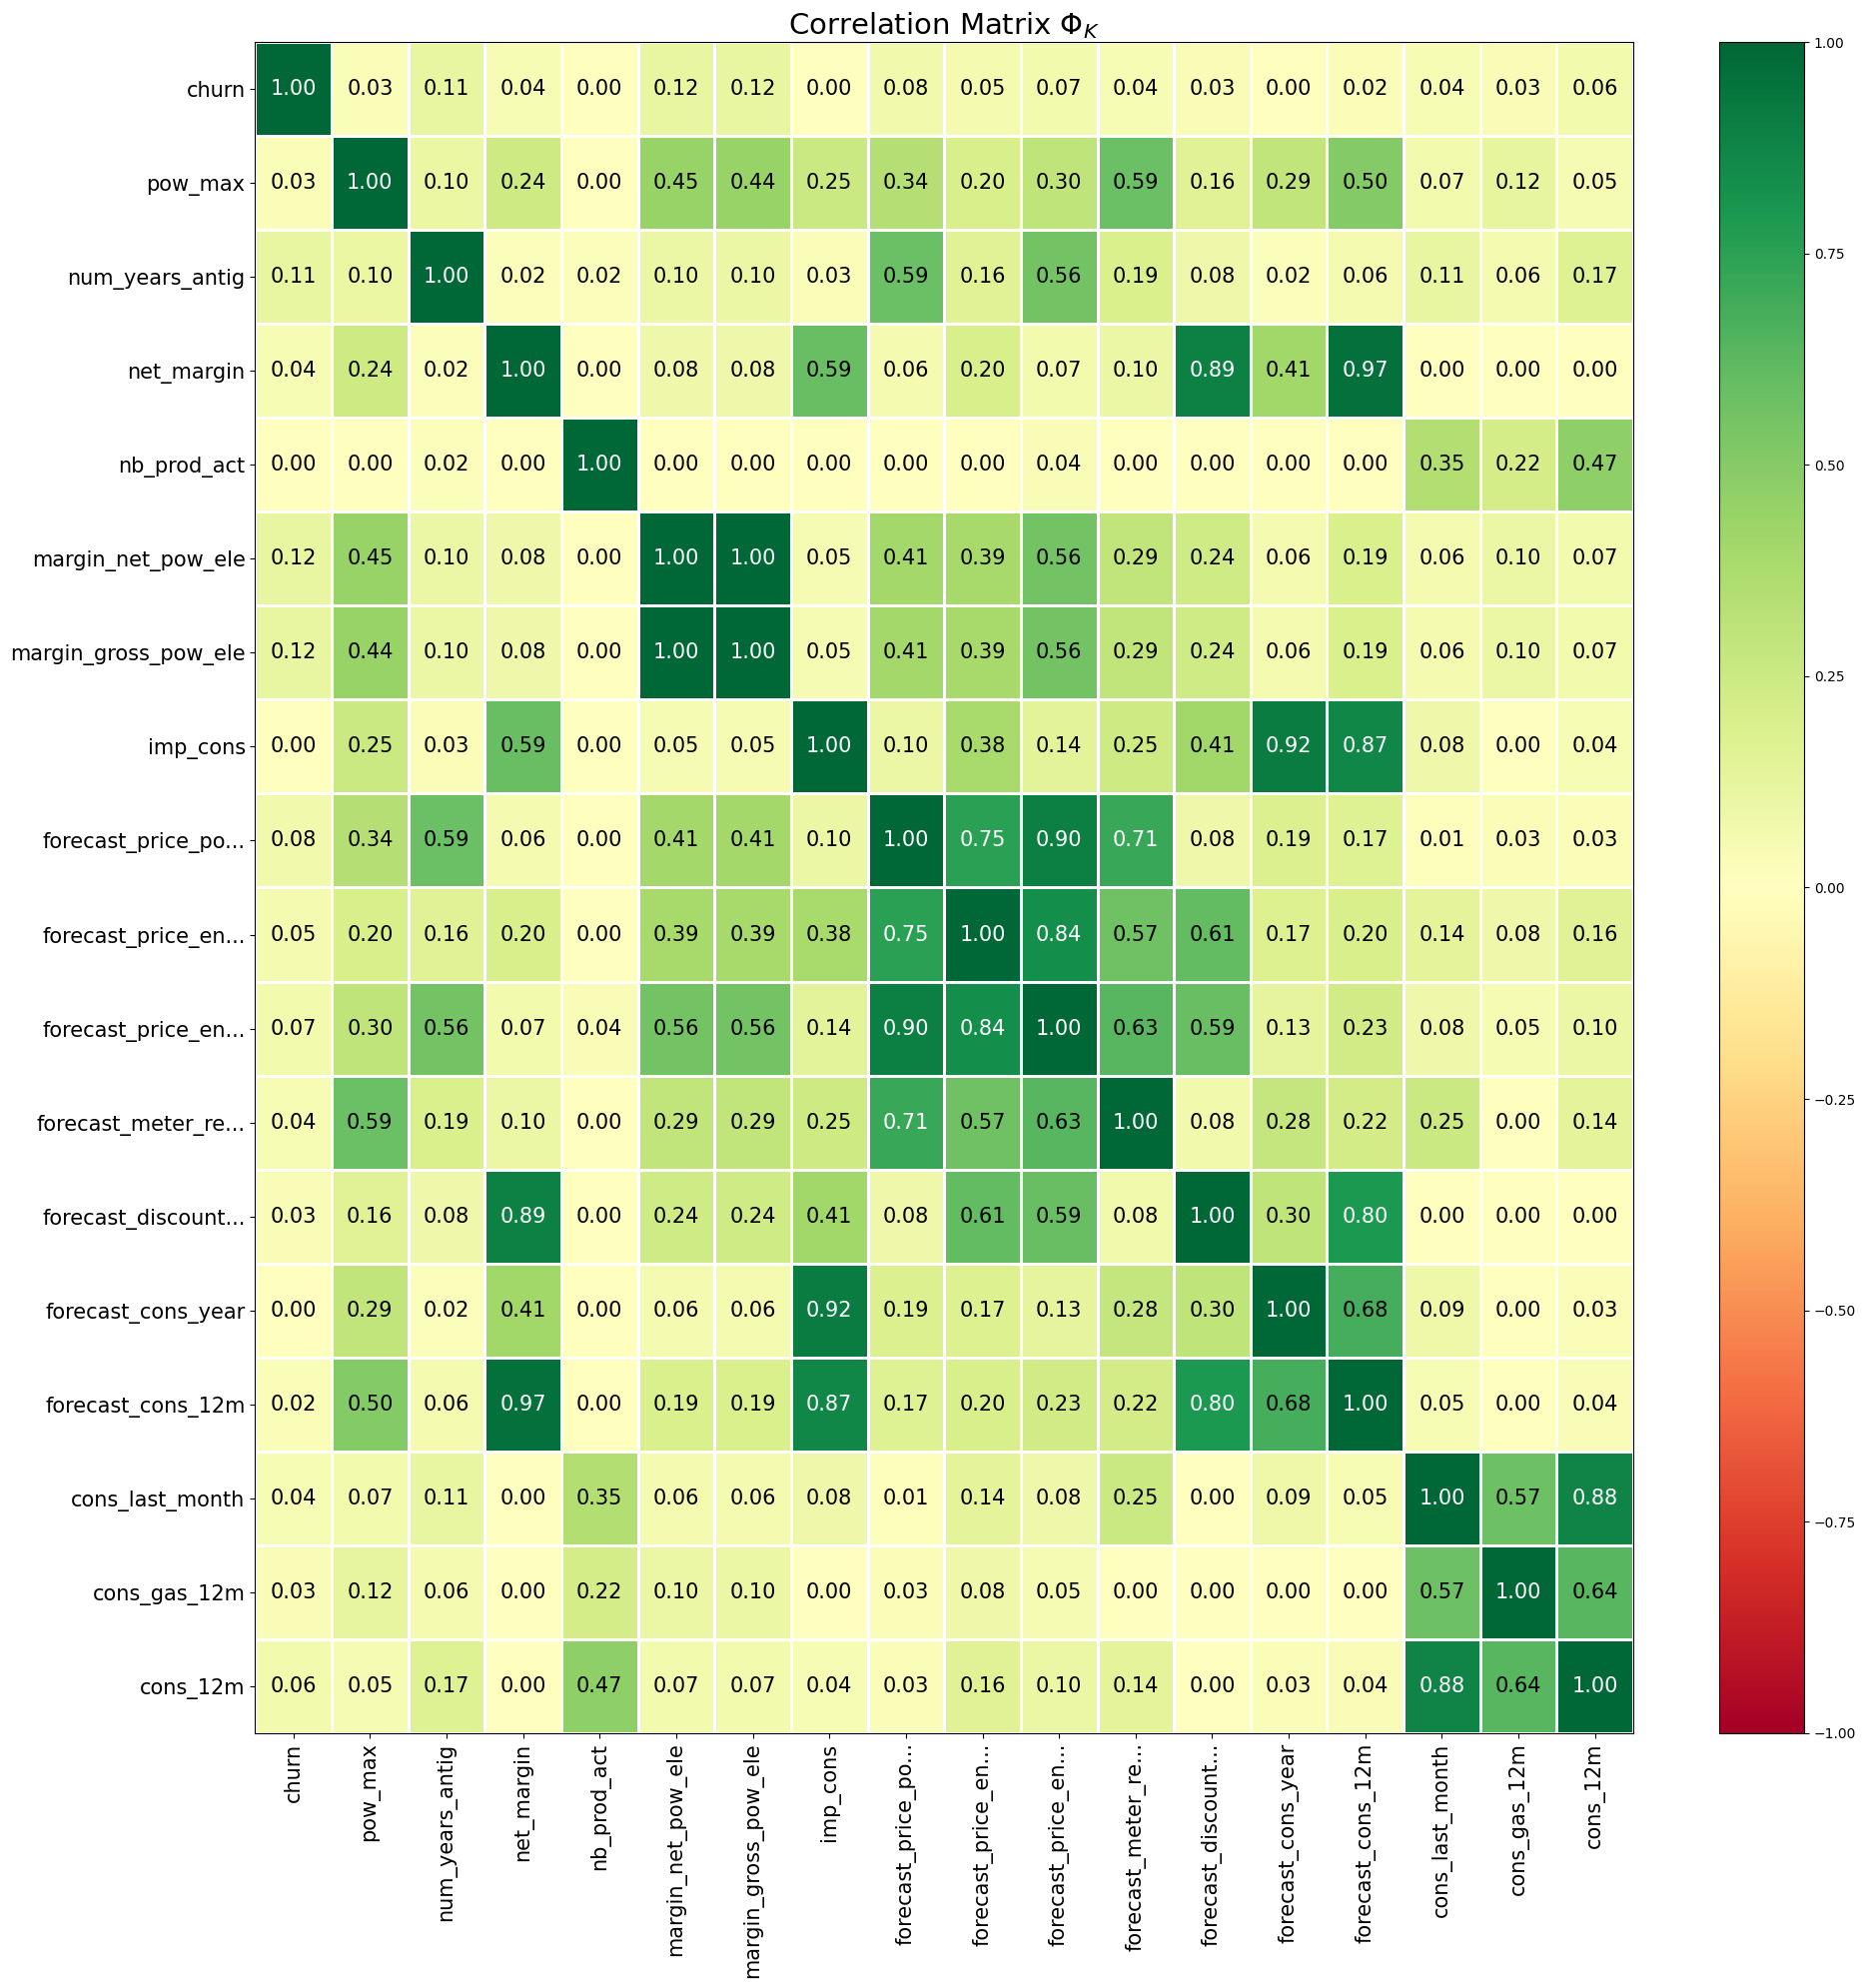

In [15]:
# A correlation matrix for all numeric feature  values
# For the correlation analysis, I will use Phi-K to determine the relationship between the variableshich ranges b/n 0 and 1

cm = cl_df[num_feature_cols + ['churn']].phik_matrix(interval_cols=num_feature_cols)

plot_correlation_matrix(cm.values,
                        x_labels=cm.columns,
                        y_labels=cm.index,
                        title=r'Correlation Matrix $\Phi_K$',
                        figsize=(20,20),
                        fontsize_factor=1.5
                        )

plt.tight_layout()

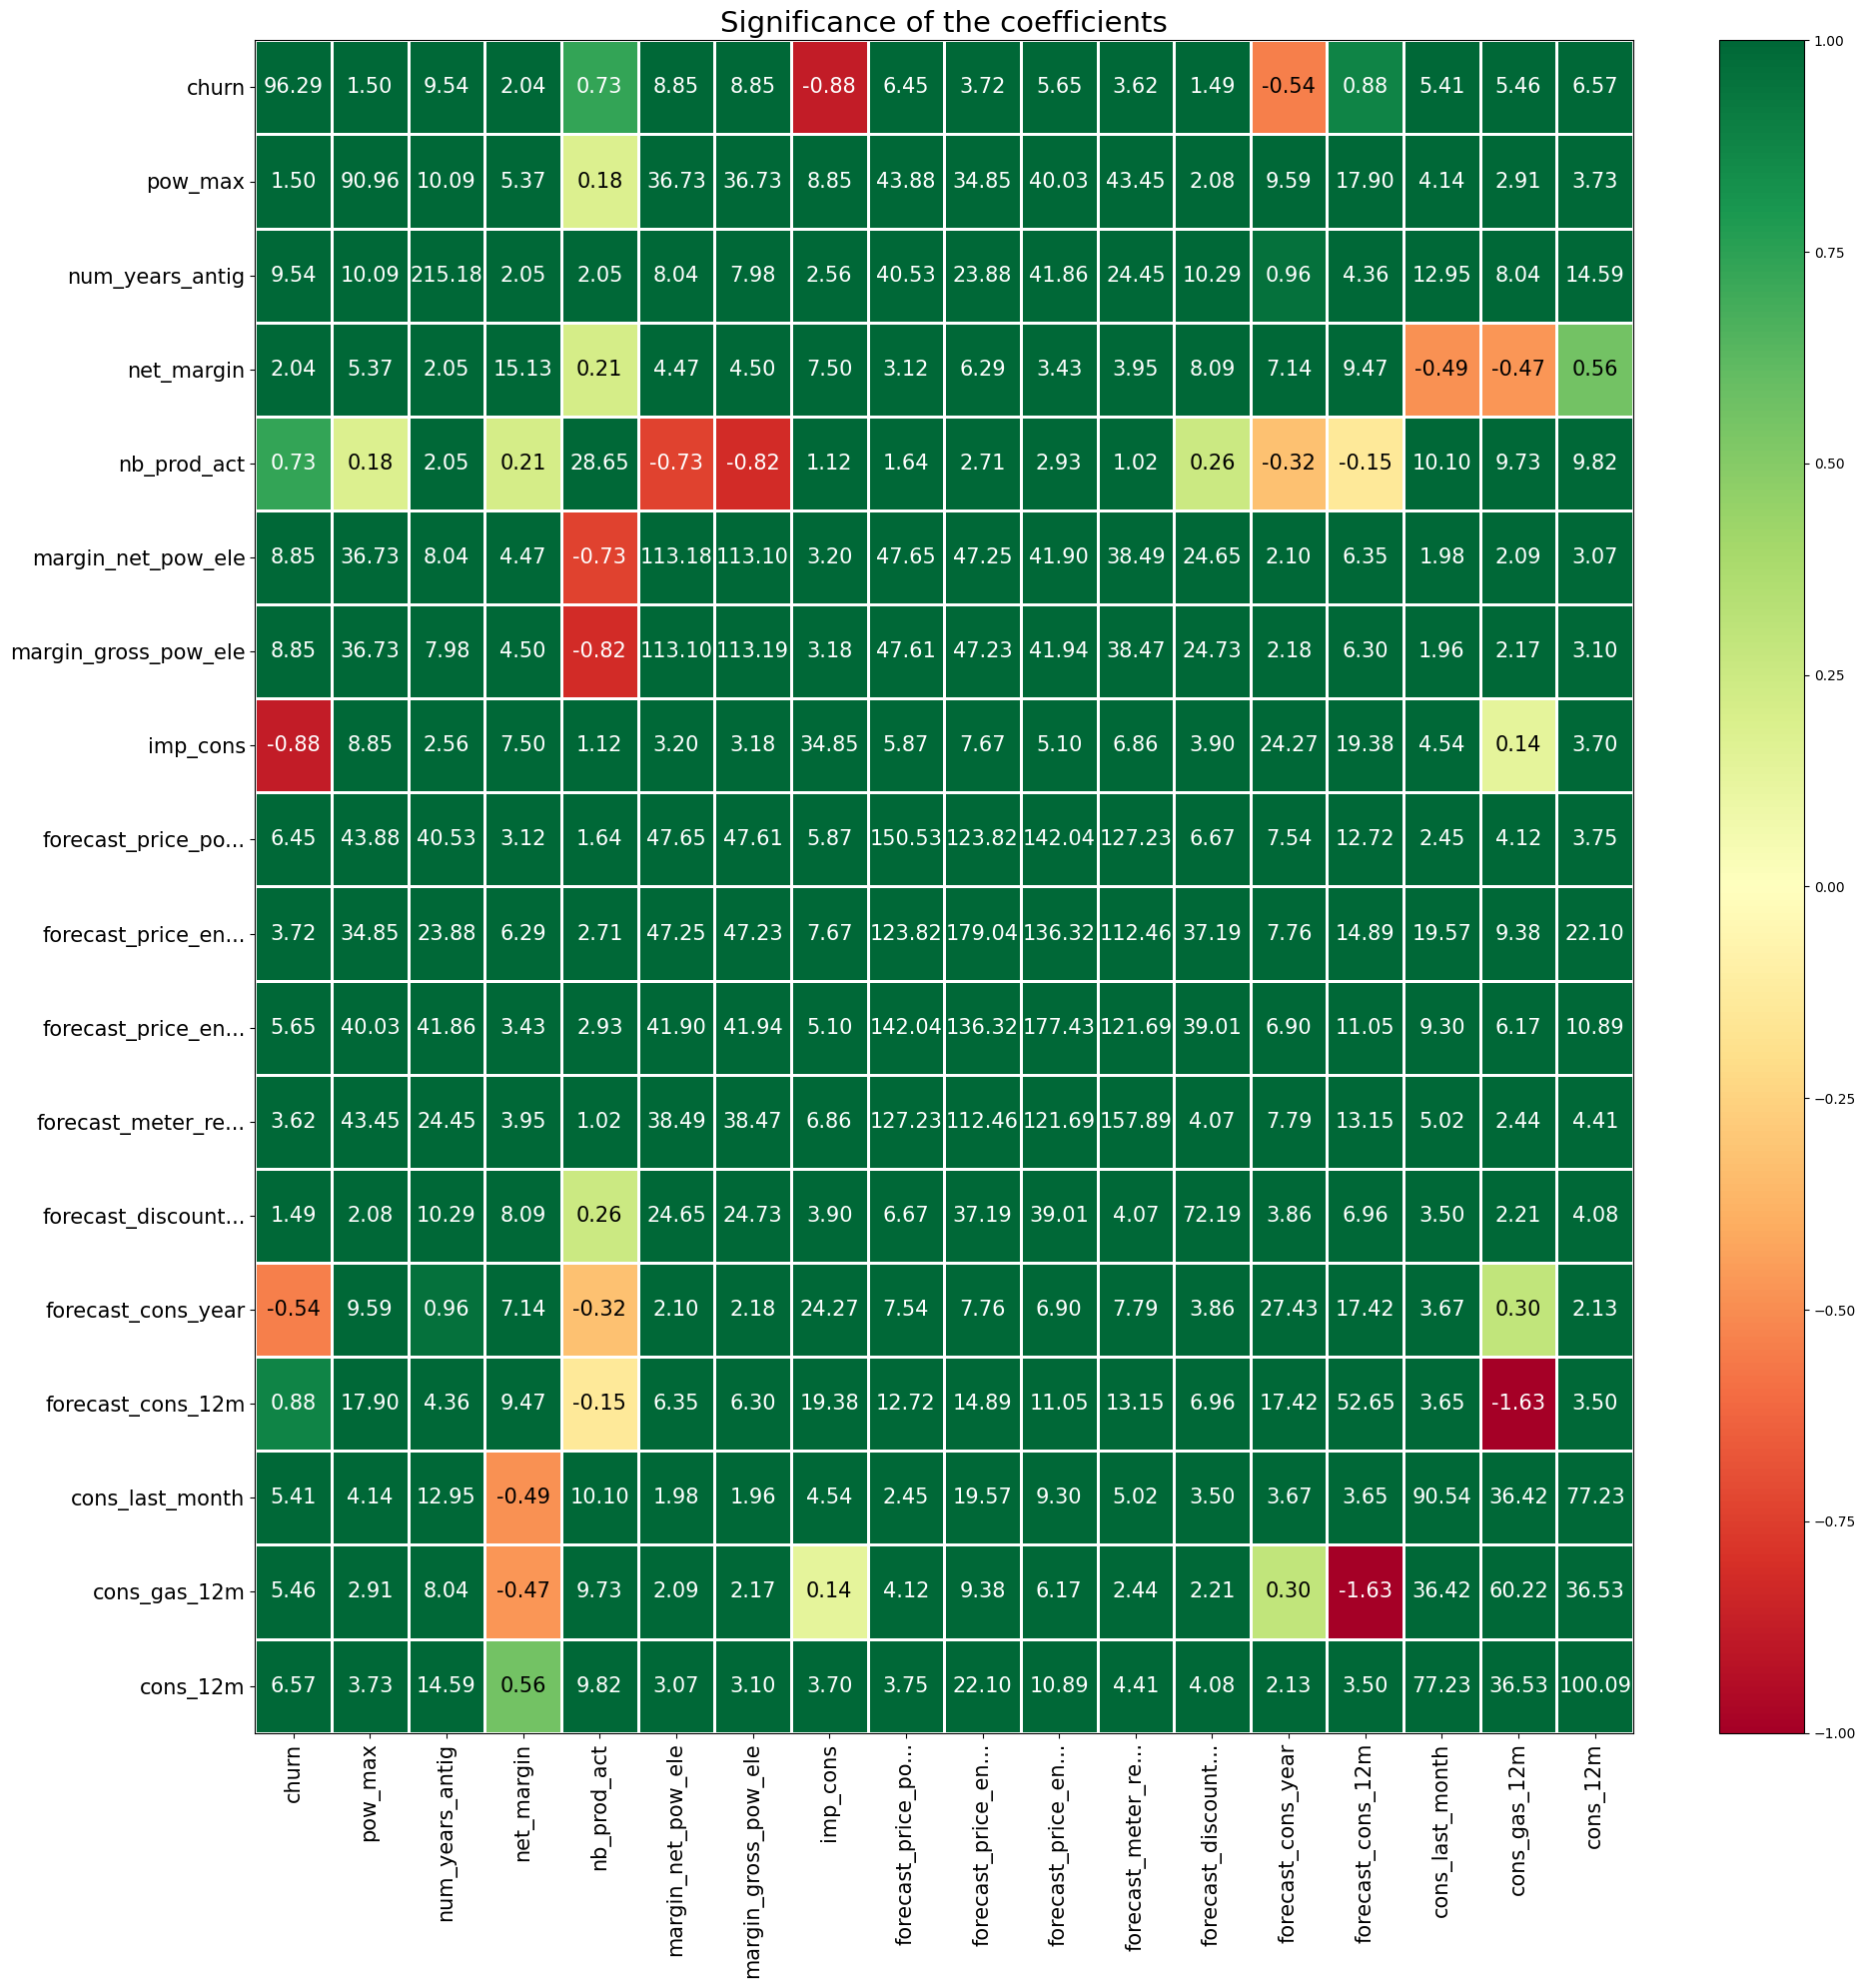

In [16]:
# Checking the statistical significance of the Phi_k correlation coefficient

sm = cl_df[num_feature_cols + ['churn']].significance_matrix(interval_cols=num_feature_cols)

plot_correlation_matrix(sm.fillna(0).values,
                        x_labels=sm.columns,
                        y_labels=sm.index,
                        title=r'Significance of the coefficients',
                        figsize=(20,20),
                        fontsize_factor=1.5
                        )

plt.tight_layout()

In [17]:
# Determining Price Sensitivity

# To do this, I will use the stats models package to the customer churn using logistic regression and check for the significance of the coefficients
cl_df_proc = pd.get_dummies(cl_df, columns = ['has_gas'], drop_first=True)


# Taking out the collinear columns due to multi-colinearity effects
num_feature_cols = [col for col in cl_df_proc.columns if col in cl_df_proc.select_dtypes('number').columns and col not in ['churn', 'net_margin', 'margin_net_pow_ele', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_energy_off_peak', 'cons_gas_12m', 'id']]


label = cl_df_proc['churn']


# Building Logistic Regression
log_reg = stats_models.Logit(label, cl_df_proc[num_feature_cols]).fit()


# Get the summary
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.311339
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                14606
Model:                          Logit   Df Residuals:                    14593
Method:                           MLE   Df Model:                           12
Date:                Wed, 25 Jan 2023   Pseudo R-squ.:                 0.02334
Time:                        01:06:42   Log-Likelihood:                -4547.4
converged:                       True   LL-Null:                       -4656.1
Covariance Type:            nonrobust   LLR p-value:                 8.426e-40
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
cons_12m                    -4.017e-07    3.3e-07     -1.216      0.224   

> In the above, I developed an empirical model to predict probability of churn using logistic regression. Here, churn was dependent variable with the other variables being my independent variable. To determine the price sensitivity, I was interested to find out whether the the coeffiecient of forecast_price_pow_off_peak is statistically significant. From the logistic regression model above, the coefficient of forecast_price_pow_off_peak is statistically significant  with the coefficient being negative meaning, as the forecasted price increases, the probability of of churn reduces.


Price sensitivity is normally measured as the price elasticity of demand. From theory, electricity prices are inelastic and this data confirms same. Generally, when price increases consumers do not have an option but stay with their current provider, the inverse is true.

## Task 3




In [18]:
df_url = 'Data/price_data.csv'

# load csv with dates parsed
price_df = pd.read_csv(df_url, parse_dates=['price_date'])


price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [19]:
# Rewritten code by colleague

jan_prices = (
    price_df
    .groupby(['id', 'price_date'])
    .agg({'price_off_peak_var': 'mean',
          'price_off_peak_fix': 'mean'
          })
    .reset_index()
    .groupby('id')
    .first()
    .reset_index()
)    



dec_prices = (
    price_df
    .groupby(['id', 'price_date'])
    .agg({'price_off_peak_var': 'mean',
          'price_off_peak_fix': 'mean'
          })
    .reset_index()
    .groupby('id')
    .last()
    .reset_index()
)



price_df_proc = (
    pd.merge(
        dec_prices.rename(columns={
            'price_off_peak_var': 'dec_1', 
            'price_off_peak_fix': 'dec_2'
            }),
        jan_prices.drop(columns='price_date'),
        on='id'
    )
    .assign(
        offpeak_diff_dec_january_energy = lambda df_: df_['dec_1'] - df_['price_off_peak_var'],
        offpeak_diff_dec_january_power = lambda df_: df_['dec_2'] - df_['price_off_peak_fix']
    )
    # [['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
)

In [20]:
# Feature Engineering

cl_df_proc = (
    cl_df_proc
    .assign(
        # Difference b/n forecasted energy price for periods 2 and 1
        price_diff_energy_peak_offpeak = lambda df_: df_['forecast_price_energy_peak'] - df_['forecast_price_energy_off_peak'],
        # Length of the contract in days
        contract_length = lambda df_: (df_['date_end'] - df_['date_activ']).dt.days
    )
)

# Taking out the collinear columns due to multi-colinearity effects
num_feature_cols = [col for col in cl_df_proc.columns if col in cl_df_proc.select_dtypes('number').columns and col not in ['churn', 'net_margin', 'margin_net_pow_ele', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_energy_off_peak', 'cons_gas_12m', 'id']]


y = cl_df_proc['churn'].values

X = cl_df_proc[num_feature_cols].values


# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=123,
                                                    stratify=y)

# Standardize the values
sc_x = StandardScaler()


X_train_std = sc_x.fit_transform(X_train)

# Transform the test values
X_test_std = sc_x.transform(X_test)


# Initialize the random forest classifier
rf = RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=1)

# Fit the classifier
rf = rf.fit(X_train_std, y_train)

# Determine the training Accuracy
y_train_pred = rf.predict(X_train_std)


train_report = classification_report(y_train, y_train_pred)



print(f'{train_report}')




              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10549
           1       1.00      0.96      0.98      1135

    accuracy                           1.00     11684
   macro avg       1.00      0.98      0.99     11684
weighted avg       1.00      1.00      1.00     11684



In [21]:
# Predict the test 
y_test_pred = rf.predict(X_test_std)


test_report = classification_report(y_test, y_test_pred)


print(f'{test_report}')



              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2638
           1       0.75      0.06      0.12       284

    accuracy                           0.91      2922
   macro avg       0.83      0.53      0.53      2922
weighted avg       0.89      0.91      0.87      2922



> Because we'd like to determine accurately predict the customers who will churn, the recall metric is ideal due to the class imbalance of the data. Recall measures the percentage of churned customers correctly classified.

> From the above the recall for the test data is 0.87 vs 1.0 from the training data.It can be seen that the model overfits the training data. To deal with this overfitting, 

In [22]:
cl_df_proc['churn'].value_counts(normalize=True)

0    0.902848
1    0.097152
Name: churn, dtype: float64

In [108]:
## FIXING Class Imbalance

# Upsampling the No Churn class (Generating more data)

churn_df = cl_df_proc.loc[cl_df_proc['churn'] == 1]

no_churn_df  = cl_df_proc.loc[cl_df_proc['churn'] == 0]


df_upsample = resample(
    churn_df,
    replace=True,
    n_samples=len(no_churn_df),
    random_state=123
)


new_cl_df_proc = pd.concat([no_churn_df, df_upsample])



y = new_cl_df_proc['churn']

X = new_cl_df_proc[num_feature_cols]


# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=123,
                                                    stratify=y)


# Initialize the random forest classifier
rf = RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=1)

# Fit the classifier
rf = rf.fit(X_train, y_train)

# Determine the training Accuracy
y_train_pred = rf.predict(X_train)


train_report = classification_report(y_train, y_train_pred)



print(f'{train_report}')


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10549
           1       1.00      1.00      1.00     10550

    accuracy                           1.00     21099
   macro avg       1.00      1.00      1.00     21099
weighted avg       1.00      1.00      1.00     21099



In [109]:
# Predict the test 
y_test_pred = rf.predict(X_test)


test_report = classification_report(y_test, y_test_pred)


print(f'{test_report}')


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2638
           1       0.98      1.00      0.99      2637

    accuracy                           0.99      5275
   macro avg       0.99      0.99      0.99      5275
weighted avg       0.99      0.99      0.99      5275



In [68]:
new_cl_df_proc['churn'].value_counts()

0    13187
1    13187
Name: churn, dtype: int64

### Building My App 

In [91]:
# Creating a function for my app

def pred_churn(cons_12m,
 cons_last_month,
 forecast_cons_12m,
 forecast_cons_year,
 forecast_discount_energy,
 forecast_meter_rent_12m,
 forecast_price_pow_off_peak,
 imp_cons,
 margin_gross_pow_ele,
 nb_prod_act,
 num_years_antig,
 pow_max,
 has_gas_t,
 price_diff_energy_peak_offpeak,
 contract_length):
    x = np.array([cons_12m,
 cons_last_month,
 forecast_cons_12m,
 forecast_cons_year,
 forecast_discount_energy,
 forecast_meter_rent_12m,
 forecast_price_pow_off_peak,
 imp_cons,
 margin_gross_pow_ele,
 nb_prod_act,
 num_years_antig,
 pow_max,
 has_gas_t,
 price_diff_energy_peak_offpeak,
 contract_length])
    
   #  standardize the data
   #  x_std = sc_x.transform(x)
    prediction = rf.predict(x.reshape(1, -1))
    
    return prediction


outputs = gr.outputs.Textbox()


app = gr.Interface(fn=pred_churn, inputs=['number','number','number','number','number','number','number','number','number','number','number','number','number','number','number'], outputs=outputs)

app.launch()

c:\Users\marvi\OneDrive\Documents\Crown City\ML Assessment\venv\lib\site-packages\gradio\outputs.py:22: UserWarning:

Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components



Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [116]:
from skops import hub_utils
import pickle
import sklearn

# let's save the model
model_path = "rf_model.pkl"
local_repo = "my-random-forrest-model"
with open(model_path, mode="bw") as f:
    pickle.dump(rf, file=f)


# we will now initialize a local repository
hub_utils.init(
    model=model_path, 
    requirements=[f"scikit-learn={sklearn.__version__}"], 
    dst=local_repo,
    task="tabular-classification",
    data=X_test,
)

In [117]:
from skops import card
from pathlib import Path

# create the card using the _model and config.json
model_card = card.Card('my-random-forrest-model/rf_model.pkl', metadata=card.metadata_from_config(Path('my-random-forrest-model/config.json')))

limitations = "This model is not ready to be used in production."
model_description = "This is a RandomForrestClassifier model trained on SME Churn Dataset."
model_card_authors = "Marvin Lomo"
get_started_code = "import pickle \nwith open(dtc_pkl_filename, 'rb') as file: \n    clf = pickle.load(file)"
citation_bibtex = "bibtex\n@inproceedings{...,year={2023}}"

# we can add the information using add
model_card.add(
    citation_bibtex=citation_bibtex,
    get_started_code=get_started_code,
    model_card_authors=model_card_authors,
    limitations=limitations,
    model_description=model_description,
)

# we can set the metadata part directly
model_card.metadata.license = "mit"

In [118]:
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix,
                            accuracy_score, f1_score)


# let's make a prediction and evaluate the model
y_pred = rf.predict(X_test)
# we can pass metrics using add_metrics and pass details with add
model_card.add(eval_method="The model is evaluated using test split, on accuracy and F1 score with macro average.")
model_card.add_metrics(accuracy=accuracy_score(y_test, y_pred))
model_card.add_metrics(**{"f1 score": f1_score(y_test, y_pred, average="micro")})

Card(
  model=RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=1),
  metadata.license=mit,
  metadata.library_name=sklearn,
  metadata.tags=['sklearn', 'skops', 'tabular-classification'],
  metadata.model_format=pickle,
  metadata.model_file=rf_model.pkl,
  metadata.widget={...},
  Model description/Training Procedure/... | | warm_start | False | </details>,
  Model description/Training Procedure/...</pre></div></div></div></div></div>,
  Model description/Evaluation Results=...| 0.988057 | | f1 score | 0.988057 |,
  citation_bibtex=bibtex @inproceedings{...,year={2023}},
  get_started_code=import pickle with o...b') as file: clf = pickle.load(file),
  model_card_authors=Marvin Lomo,
  limitations=This model is not ready to be used in production.,
  model_description=This is a RandomFor... model trained on SME Churn Dataset.,
  eval_method=The model is evaluated us...acy and F1 score with macro average.,
)

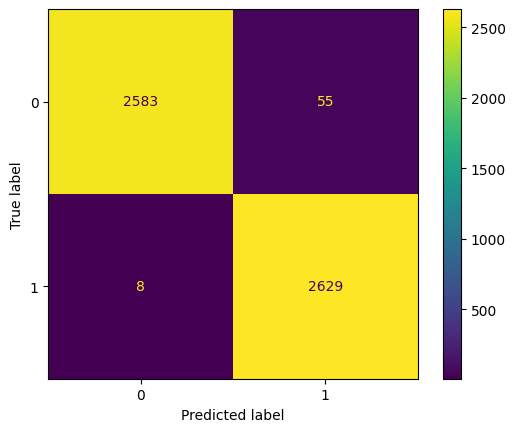

In [119]:
import matplotlib.pyplot as plt
from pathlib import Path


# we will create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

# save the plot
plt.savefig(Path(local_repo) / "confusion_matrix.png")

# the plot will be written to the model card under the name confusion_matrix
# we pass the path of the plot itself
model_card.add_plot(confusion_matrix="confusion_matrix.png")

# Save the model card
model_card.save(Path(local_repo) / 'README.md')

In [120]:
# if the repository doesn't exist remotely on the Hugging Face Hub, it will be created when we set create_remote to True
repo_id = "mklomo/rf-churn-model"

hub_utils.push(
    repo_id=repo_id,
    source=local_repo,
    # Insert write token
    token='***',
    commit_message="pushing files to the repo from the example!",
    create_remote=True,
)